# Pymaceuticals Inc.
---

### Analysis

Based on the data, it appears that there is a similar distribution between male and female mice. Two drug regimens, Ramicane and Capomulin, seem to be the most effective in reducing tumor volume. These drugs have larger sample sizes, suggesting more reliable results. On the other hand, Infubinol appears to be the least effective as it shows a wider range in tumor volume, indicating more variability.

Although the data suggests a slight increase in tumor volume with increasing mouse weight, there doesn't seem to be a strong correlation between weight and tumor volume. Therefore, other factors may play a more significant role in determining tumor volume.

Overall, the analysis indicates that Ramicane and Capomulin may be the more promising drugs for reducing tumor volume, while further investigation is needed to understand the relationship between weight and tumor volume in more detail.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata,
                                 how='left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ids = "g989"
duplicate_data = combined_data_df[combined_data_df["Mouse ID"] == duplicate_mice_ids]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mice_count = clean_study_data_complete["Mouse ID"].nunique()
final_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_dev = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = {"Mean Tumor Volume": tumor_mean,
              "Median Tumor Volume": tumor_median, 
              "Tumor Volume Variance": tumor_var, 
              "Tumor Volume Std. Dev.": tumor_dev, 
              "Tumor Volume Std. Err.": tumor_sem}
summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": 
                                                                      ["mean", "median", "var", "std", "sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
clean_study_data_complete["Drug Regimen"].value_counts()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

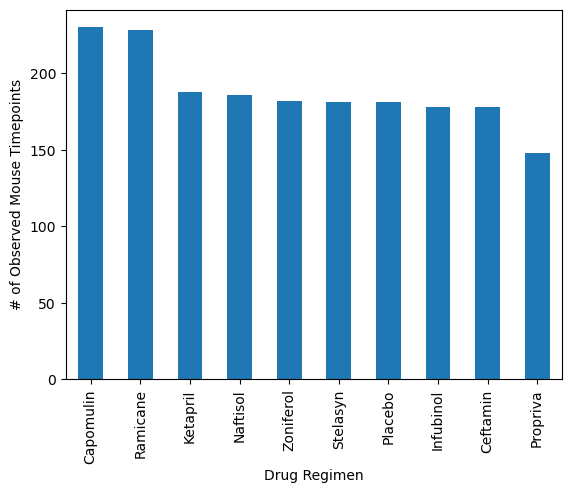

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_regimen = clean_study_data_complete["Drug Regimen"].value_counts()
pandas_regimen.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

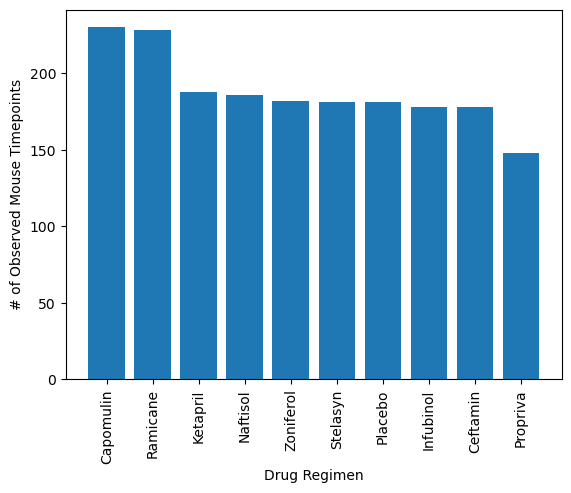

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_regimen = clean_study_data_complete["Drug Regimen"].value_counts()
plt.bar(pyplot_regimen.index.values, pyplot_regimen.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

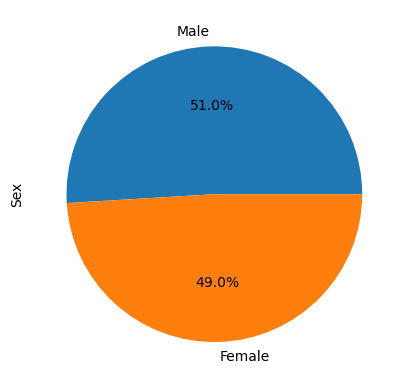

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_distribution = clean_study_data_complete["Sex"].value_counts()
pandas_distribution.plot(kind="pie", autopct="%1.1f%%")
plt.xticks(rotation=90)
plt.ylabel("Sex")
plt.show()

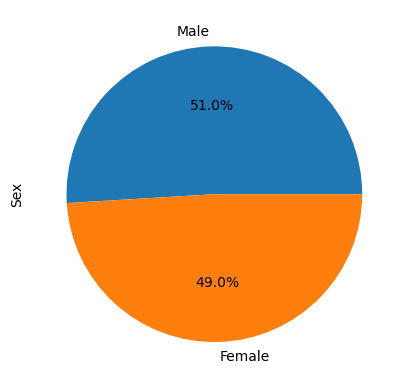

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_distribution = clean_study_data_complete["Sex"].value_counts()
plt.pie(pyplot_distribution.values, labels=pyplot_distribution.index, autopct="%1.1f%%")
plt.xticks(rotation=90)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepointmer
merge_tumor = max_tumor.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merge_tumor.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol = merge_tumor.loc[merge_tumor["Drug Regimen"]== x, "Tumor Volume (mm3)"]

#     # add subset 
    tumor_list.append(vol)
    tumor_list
    # Determine outliers using upper and lower bounds
    #quartiles
quartiles = vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = vol.loc[(vol < lower_bound) | (vol > upper_bound)]

print(f"{x}'s potential outliers:{outliers}")

Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


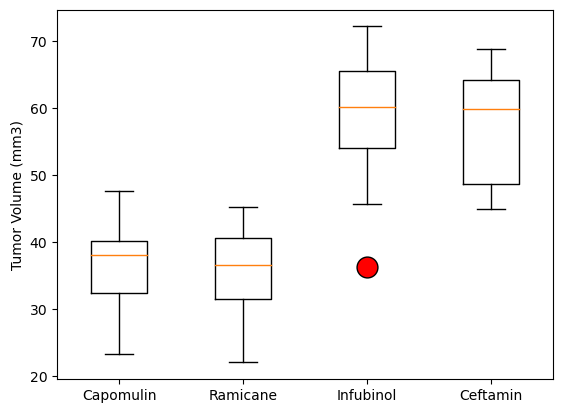

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

outlier = dict(markerfacecolor="red", markersize=15)
fig1, ax1 = plt.subplots()
plt.boxplot(tumor_list, labels=treatments, flierprops=outlier)
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

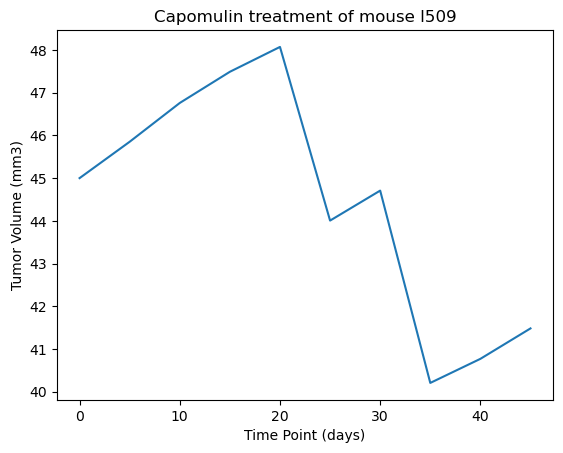

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Obtain the data for a single mouse treated with Capomulin
mouse_data = clean_study_data_complete.loc[clean_study_data_complete
                                           ["Mouse ID"] == "l509"].sort_values("Timepoint")

# Create the line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Set the plot title and labels
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

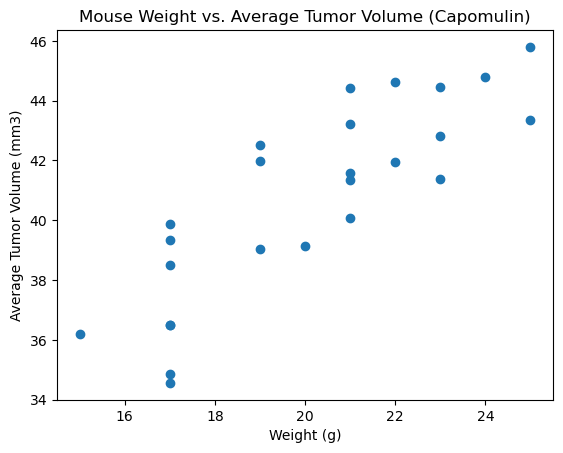

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_data_complete[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
average_tumor_volume_data = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight_data = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight_data, average_tumor_volume_data)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


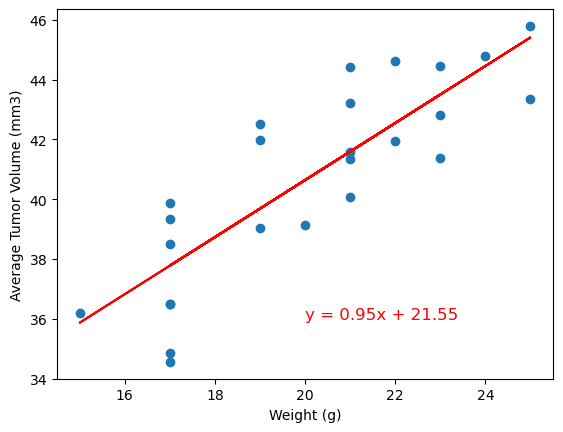

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coef = st.pearsonr(mouse_weight_data, average_tumor_volume_data)[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coef.round(2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight_data, average_tumor_volume_data)
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
plt.scatter(mouse_weight_data, average_tumor_volume_data)
regress_values = mouse_weight_data * slope + intercept
plt.plot(mouse_weight_data, regress_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, (20, 36), fontsize=12, color="red")
plt.show()